In [1]:
import os, sys, copy
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl

import xarray as xr
import xesmf as xe

In [2]:
# New field
iceInput = 'arctic6.nc'
newField = xr.open_dataset(iceInput)

# Fit to bathymetry
gridFile = '../configs/Arctic6/roms/grid_Arctic_6.nc'
romsGrid = xr.open_dataset(gridFile)
romsGrid = romsGrid.set_coords(['lat_rho', 'lon_rho'])

# Change names of coordinates and variables so they align with the new field
romsGrid = romsGrid.rename({'lon_rho': 'lon', 'lat_rho': 'lat', 'eta_rho': 'y', 'xi_rho': 'x'})

In [3]:
newField

<xarray.Dataset>
Dimensions:    (bath: 2, eta_psi: 1393, eta_u: 1394, eta_v: 1393, two: 2, x: 1082, xi_psi: 1081, xi_u: 1081, xi_v: 1082, y: 1394)
Coordinates:
    lat        (y, x) float64 ...
    lon        (y, x) float64 ...
Dimensions without coordinates: bath, eta_psi, eta_u, eta_v, two, x, xi_psi, xi_u, xi_v, y
Data variables: (12/48)
    xl         float64 ...
    el         float64 ...
    JPRJ       (two) |S1 ...
    PLAT       (two) float64 ...
    PLONG      float64 ...
    ROTA       float64 ...
    ...         ...
    mask_psi   (eta_psi, xi_psi) float64 ...
    angle      (y, x) float64 ...
    h_mask     (y, x) float64 ...
    mask_2     (y, x) float64 ...
    mask_diff  (y, x) float64 ...
    hice       (y, x) float64 ...
Attributes:
    type:                       Gridpak file
    gridid:                     Arctic #6
    history:                    Thu Mar 11 14:29:34 2021: ncks -A -v mask_rho...
    CPP-options:                 DCOMPLEX, DBLEPREC, ELLIPSOID,
    history_of_appended_files:  Thu Mar 11 14:29:34 2021: Appended file grid_...
    NCO:                        "4.6.1"

In [4]:
romsGrid

<xarray.Dataset>
Dimensions:    (bath: 2, eta_psi: 1393, eta_u: 1394, eta_v: 1393, two: 2, x: 1082, xi_psi: 1081, xi_u: 1081, xi_v: 1082, y: 1394)
Coordinates:
    lat        (y, x) float64 ...
    lon        (y, x) float64 ...
Dimensions without coordinates: bath, eta_psi, eta_u, eta_v, two, x, xi_psi, xi_u, xi_v, y
Data variables: (12/47)
    xl         float64 ...
    el         float64 ...
    JPRJ       (two) |S1 ...
    PLAT       (two) float64 ...
    PLONG      float64 ...
    ROTA       float64 ...
    ...         ...
    mask_v     (eta_v, xi_v) float64 ...
    mask_psi   (eta_psi, xi_psi) float64 ...
    angle      (y, x) float64 ...
    h_mask     (y, x) float64 ...
    mask_2     (y, x) float64 ...
    mask_diff  (y, x) float64 ...
Attributes:
    type:                       Gridpak file
    gridid:                     Arctic #6
    history:                    Thu Mar 11 14:29:34 2021: ncks -A -v mask_rho...
    CPP-options:                 DCOMPLEX, DBLEPREC, ELLIPSOID,
    history_of_appended_files:  Thu Mar 11 14:29:34 2021: Appended file grid_...
    NCO:                        "4.6.1"

In [5]:
romsGrid.h_mask.isnull()

<xarray.DataArray 'h_mask' (y: 1394, x: 1082)>
array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])
Coordinates:
    lat      (y, x) float64 ...
    lon      (y, x) float64 ...
Dimensions without coordinates: y, x

In [6]:
newField.coords['mask'] = (('y','x'), romsGrid.h_mask.isnull())

In [7]:
newField

<xarray.Dataset>
Dimensions:    (bath: 2, eta_psi: 1393, eta_u: 1394, eta_v: 1393, two: 2, x: 1082, xi_psi: 1081, xi_u: 1081, xi_v: 1082, y: 1394)
Coordinates:
    lat        (y, x) float64 ...
    lon        (y, x) float64 ...
    mask       (y, x) bool True True True True True ... True True True True True
Dimensions without coordinates: bath, eta_psi, eta_u, eta_v, two, x, xi_psi, xi_u, xi_v, y
Data variables: (12/48)
    xl         float64 0.0
    el         float64 0.0
    JPRJ       (two) |S1 b'' b''
    PLAT       (two) float64 9.969e+36 9.969e+36
    PLONG      float64 9.969e+36
    ROTA       float64 9.969e+36
    ...         ...
    mask_psi   (eta_psi, xi_psi) float64 ...
    angle      (y, x) float64 ...
    h_mask     (y, x) float64 ...
    mask_2     (y, x) float64 ...
    mask_diff  (y, x) float64 ...
    hice       (y, x) float64 ...
Attributes:
    type:                       Gridpak file
    gridid:                     Arctic #6
    history:                    Thu Mar 11 14:29:34 2021: ncks -A -v mask_rho...
    CPP-options:                 DCOMPLEX, DBLEPREC, ELLIPSOID,
    history_of_appended_files:  Thu Mar 11 14:29:34 2021: Appended file grid_...
    NCO:                        "4.6.1"

In [9]:
newField['ice'] = newField.hice.where(newField.mask == False)

In [10]:
newField

<xarray.Dataset>
Dimensions:    (bath: 2, eta_psi: 1393, eta_u: 1394, eta_v: 1393, two: 2, x: 1082, xi_psi: 1081, xi_u: 1081, xi_v: 1082, y: 1394)
Coordinates:
    lat        (y, x) float64 ...
    lon        (y, x) float64 ...
    mask       (y, x) bool True True True True True ... True True True True True
Dimensions without coordinates: bath, eta_psi, eta_u, eta_v, two, x, xi_psi, xi_u, xi_v, y
Data variables: (12/49)
    xl         float64 0.0
    el         float64 0.0
    JPRJ       (two) |S1 b'' b''
    PLAT       (two) float64 9.969e+36 9.969e+36
    PLONG      float64 9.969e+36
    ROTA       float64 9.969e+36
    ...         ...
    angle      (y, x) float64 ...
    h_mask     (y, x) float64 ...
    mask_2     (y, x) float64 ...
    mask_diff  (y, x) float64 ...
    hice       (y, x) float64 ...
    ice        (y, x) float64 nan nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    type:                       Gridpak file
    gridid:                     Arctic #6
    history:                    Thu Mar 11 14:29:34 2021: ncks -A -v mask_rho...
    CPP-options:                 DCOMPLEX, DBLEPREC, ELLIPSOID,
    history_of_appended_files:  Thu Mar 11 14:29:34 2021: Appended file grid_...
    NCO:                        "4.6.1"

In [11]:
newField['ice2'] = newField.ice.where(newField.ice != 0, drop=True)

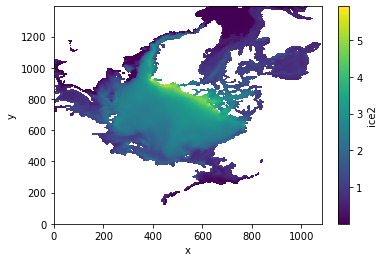

In [12]:
newField.ice2.plot()

In [ ]:
import numpy as np
import scipy as sp
help(sp.interpolate)

In [ ]:
np.count_nonzero(~np.isnan(newField.ice))

In [ ]:
newField['ice3'] = sp.interp

In [ ]:
np.count_nonzero(~np.isnan(newField.ice3))

In [ ]:
newField.ice3.plot()

In [ ]:
newField['ice4'] = newField.ice3.interp(method='linear')

In [ ]:
np.count_nonzero(~np.isnan(newField.ice4.interp(method='linear')))

In [ ]:
newField['iceDiff'] = newField.ice - newField.ice4

In [ ]:
newField.ice4.dropna('x').plot()